# pandas库

pandas库的两种主要数据结构：Series对象和DataFrame对象。

In [1]:
import pandas as pd

In [5]:
#创建Series对象
s=pd.Series(['赵','钱','孙','李'])
s

0    赵
1    钱
2    孙
3    李
dtype: object

Series和列表相比，主要的两点优势：

第一：在速度上，在面对数据量很大的任务的时候，Series的处理速度往往会比列表快很多；
第二：在功能上，Series会有很多专门为数据分析而创建的方法。

虽然列表和Series对象都包含索引，但是在终端查看列表和Series对象的值的时候，列表不会出现索引而Series对象会出现索引。
并且Series对象的索引是可以人为修改的。

In [6]:
#创建DataFrame对象
df=pd.DataFrame({'年龄':[23,22,21],'岗位':['客服','运营','公关'],'年购买量':[10,15,8]})
df

,年龄,岗位,年购买量
0,23,客服,10
1,22,运营,15
2,21,公关,8


In [7]:
#DataFrame的每一列都是一个Series对象！
df['岗位']

0    客服
1    运营
2    公关
Name: 岗位, dtype: object

In [8]:
#解决pandas中打印DataFrame行列显示不全的问题
 
#显示所有列
pd.set_option('display.max_columns', None)
 
#显示所有行
pd.set_option('display.max_rows', None)
 
#设置valude的显示长度为100， 默认为50
pd.set_option('max_colwidth', 100)

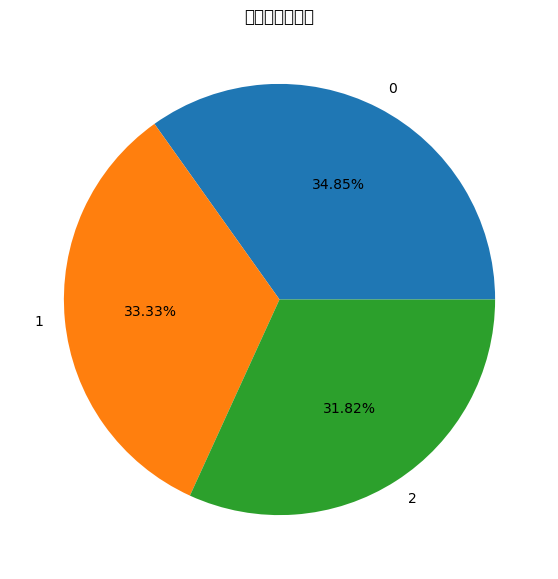

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标

df['年龄'].plot(kind = 'pie', autopct = '%.2f%%',
                figsize = (7, 7), title = '行业频率分布图',
                label = '')

plt.show()

<AxesSubplot:title={'center':'岗位频率分布图'}>

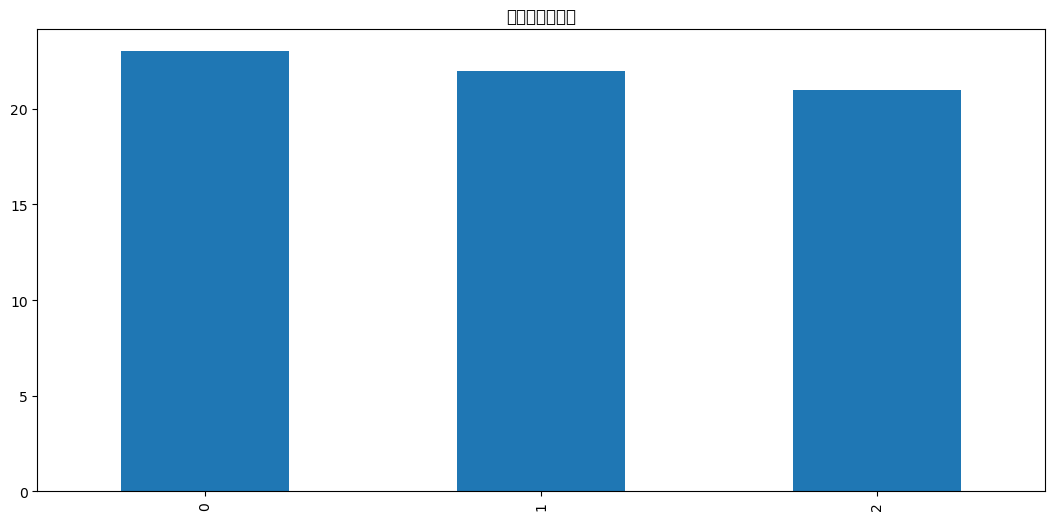

In [17]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标
df['年龄'].plot(kind = 'bar', figsize = (13, 6), title = '岗位频率分布图')

<AxesSubplot:title={'center':'本(专)科学生年龄分布直方图'}, ylabel='Frequency'>

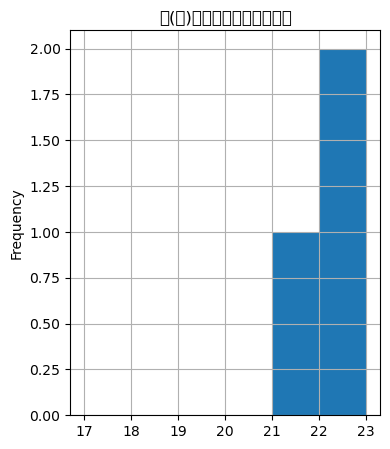

In [19]:
plt.rcParams['font.sans-serif']=['SimHei']
#bins参数：参数bins的作用是用来设置分组的。
#grid参数，设置网格
df['年龄'].plot(kind = 'hist', bins = [17, 18, 19, 20, 21, 22, 23], figsize = (4, 5),
         title = '本(专)科学生年龄分布直方图', grid = True)

<AxesSubplot:title={'center':'各月总销售额趋势图'}>

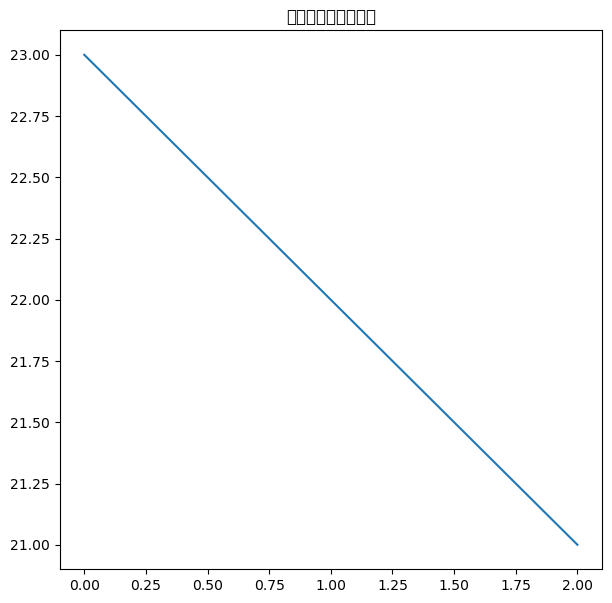

In [21]:
plt.rcParams['font.sans-serif']=['SimHei']
# 绘制各月总销售额的折线图
df['年龄'].plot(kind = 'line', figsize = (7, 7),
                 title = '各月总销售额趋势图')

# 数据清洗

In [ ]:
# 查看mask_data的缺失值
mask_data.isna()

# 删除所有缺失值
mask_data.dropna()

# 查找mask_data中的重复行
mask_data.duplicated()

# 直接删除所有重复值
mask_data = mask_data.drop_duplicates()

# 检查异常值。查看mask_data的描述性统计信息
mask_data.describe()

#布尔索引 mask_data['订单量']<=100

# 保存清洗干净的数据,index = False不写入行索引
mask_data.to_csv('./工作/mask_data_clean.csv',index = False)



# 数据分析

In [ ]:
#处理日期数据一共包含三个步骤，分别是：转化日期数据、提取月份信息以及添加新列。
# 将表中的日期数据转化成日期时间格式的数据
date_data = pd.to_datetime(mask_data_clean['日期'], format = '%Y-%m-%d')
# 提取日期数据中的月份信息
month_data = date_data.dt.month
# 添加月份信息到原数据
mask_data_clean['月份'] = month_data
# 查看mask_data_clean
mask_data_clean


In [ ]:
#分组聚合操作
# 统计各个月份总销售额
sales_price = mask_data_clean.groupby('月份')['销售额'].sum()



# 数据可视化matplotlib库

In [ ]:
# 生成画布，并设置画布的大小
plt.figure(figsize = (6, 6))
# 设置x轴和y轴的值
x = order_number.index
y = order_number.values
# 绘制折线图
# linewidth = 2, color = 'r', marker = 'o',markerfacecolor = 'blue', markersize = 8 调整图形样式
#marker给图形增加一些标记，以强调实际的数据点
plt.plot(x, y, linewidth = 2, color = 'r', marker = 'o',
         markerfacecolor = 'blue', markersize = 8)
# 调整x轴和y轴刻度值的大小
plt.xticks(size = 12)
plt.yticks(size = 12)
# 添加x轴和y轴的标签
plt.xlabel('月份', fontdict = {'size': 15})
plt.ylabel('各月总订单量', fontdict = {'size': 12})
# 设置图形的标题
plt.title('各月总订单量变化图', fontsize = 15)
# 保存图形
plt.savefig('./工作/各月口罩订单量变化折线图.png')